In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [2]:
feed_forward_model = keras.Sequential([
    layers.Input(shape=(300, 300, 3), name='input_layer'),

    layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_1'),
    layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_2'),
    layers.MaxPool2D(2, name='pool_1'),

    layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2_1'),
    layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2_2'),
    layers.MaxPool2D(2, name='pool_2'),

    layers.Conv2D(64, 3, padding='same', activation='relu', name='conv3_1'),
    layers.Conv2D(64, 3, padding='same', activation='relu', name='conv3_2'),
    layers.MaxPool2D(2, name='pool_3'),

    layers.Flatten(name='flatten'),

    layers.Dense(256, activation='relu', name='fc1'),
    layers.Dense(1, activation='sigmoid', name='output_layer')
])

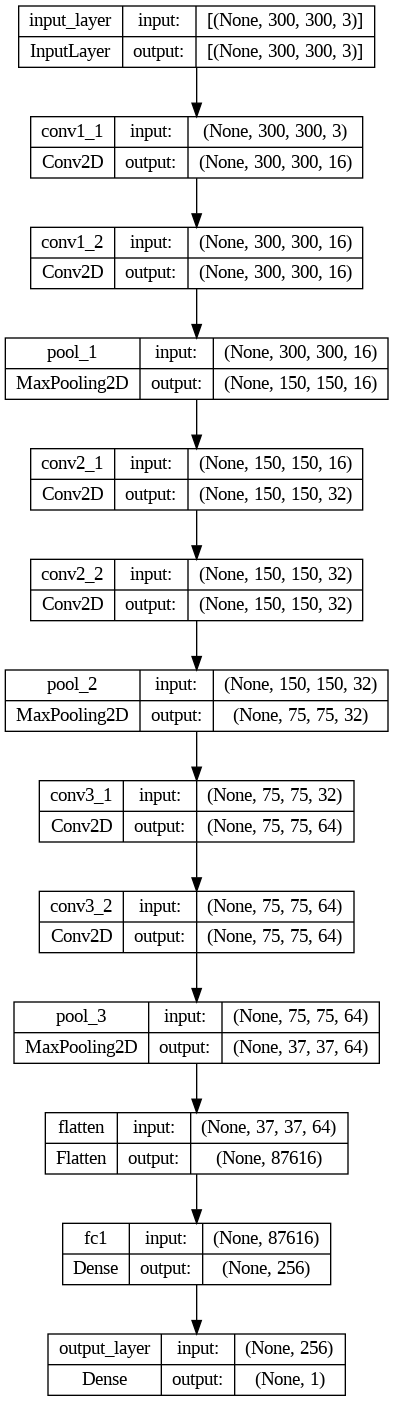

In [5]:
keras.utils.plot_model(feed_forward_model, show_shapes=True)

In [6]:
input_layer = layers.Input(shape=(300, 300, 3))

x = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_1')(input_layer)
x = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_2')(x)
x = layers.MaxPooling2D(2, name='pool_1')(x)

x = layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2_1')(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2_2')(x)
x = layers.MaxPooling2D(2, name='pool_2')(x)

x = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_1')(input_layer)
x = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_2')(x)
x = layers.MaxPooling2D(2, name='pool_1')(x)

x = layers.Conv2D(64, 3, padding='same', activation='relu', name='conv3_1')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu', name='conv3_2')(x)
x = layers.MaxPooling2D(2, name='pool_3')(x)

x = layers.Flatten(name='flatten')(x)

x = layers.Dense(256, activation='relu', name='fc1')(x)
output_layer = layers.Dense(1, activation='sigmoid', name='output_layer')(x)

model = keras.Model(inputs=input_layer, outputs = output_layer)

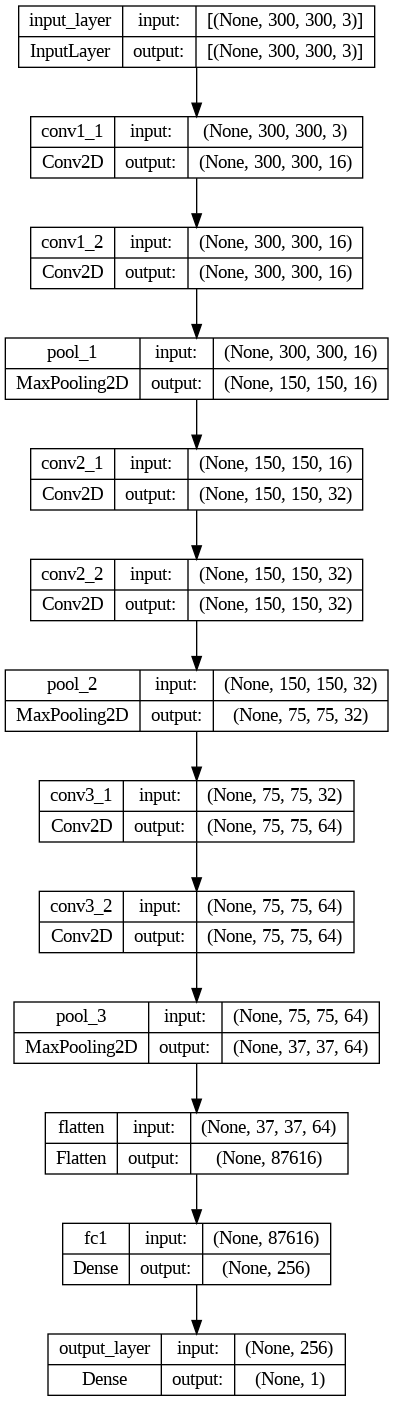

In [7]:
keras.utils.plot_model(feed_forward_model, show_shapes=True)

In [16]:
input_layer = layers.Input(shape=(300, 300, 3))

block_input = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_1')(input_layer)
x = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_2')(block_input)
x = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv1_3')(x)
x = layers.Add(name='add_1')([x, block_input])
x = layers.MaxPooling2D(2, name='pool_1')(x)

block_input = layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2_1')(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2_2')(block_input)
x = layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2_3')(x)
x = layers.Add(name='add_2')([x, block_input])
x = layers.MaxPooling2D(2, name='pool_2')(x)

#output_2 = layers.Dense(10, activation='softmax')(x)

block_input = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv3_1')(x)
x = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv3_2')(block_input)
x = layers.Conv2D(16, 3, padding='same', activation='relu', name='conv3_3')(x)
x = layers.Add(name='add_3')([x, block_input])
x = layers.MaxPooling2D(2, name='pool_3')(x)

x = layers.Flatten(name='flatten')(x)

x = layers.Dense(256, activation='relu', name='fc1')(x)
output_layer = layers.Dense(1, activation='sigmoid', name='output_layer')(x)

model = keras.Model(inputs=input_layer, outputs=output_layer)

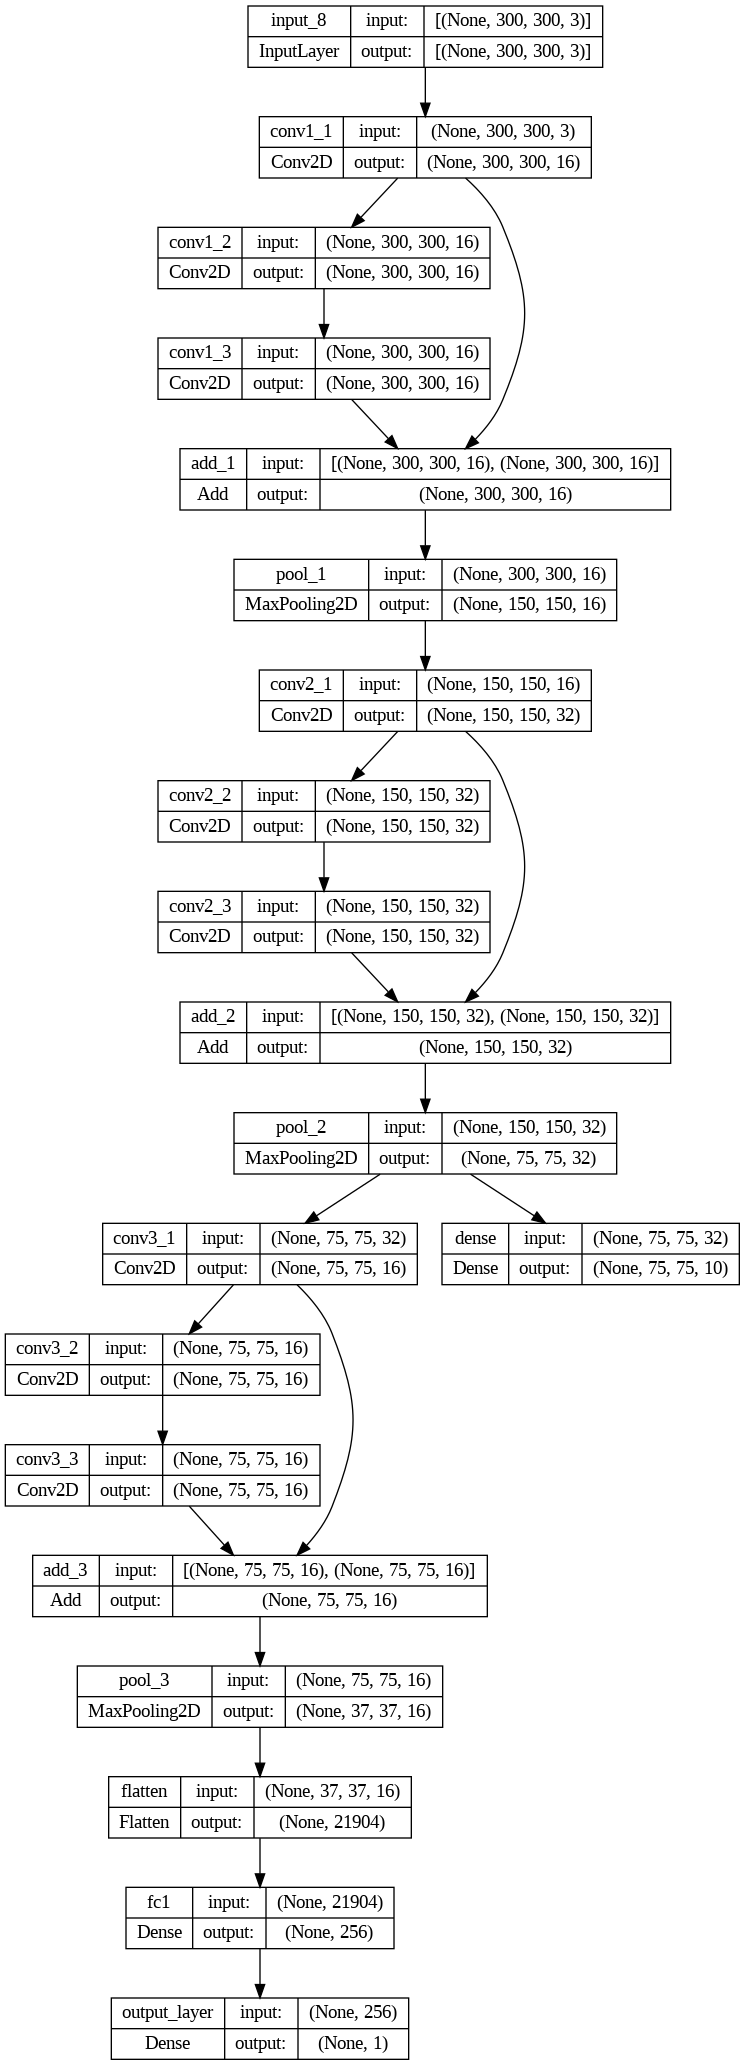

In [17]:
keras.utils.plot_model(model, show_shapes=True)

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 300, 300, 16  448         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 300, 300, 16  2320        ['conv1_1[0][0]']                
                                )                                                           